# Práctica 3

### General

In [1]:
# Carga de librerías necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['text.usetex'] = True

from IPython.display import display

from colorama import Fore, Back, Style # Colores en el output

In [2]:
def Title(msg):
    return Style.BRIGHT + Fore.BLACK + Back.WHITE + msg + Style.RESET_ALL

def Error(msg):
    return Style.BRIGHT + Fore.RED + msg + Style.RESET_ALL

### Ejercicio 2

A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).

In [ ]:
from scipy.optimize import fsolve

# De los apuntes (solo como referencia)
def euler_explicito(f, a, b, mu, N):
    """
    Método de Euler explícito para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros((N + 1,))
    x[0] = mu
    for n in range(N):
        x[n + 1] = x[n] + h * f(t[n], x[n])
    return t, x

def euler_implicito(f, a, b, mu, N):
    """
    Método de Euler implícito para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros(N + 1)
    x[0] = mu
    # x1 = sp.symbols('x1')
    for n in range(N):
        # x[n + 1] = np.float64(sp.solve(x[n]+h*f(t[n+1],x1)-x1,x1)[0])
        x[n + 1] = fsolve(lambda x1: x[n] + h * f(t[n + 1], x1) - x1, x[n])[0]
    return t, x

# A partir de aquí código propio

# Punto medio
def euler_mejorado(f, a, b, mu, N):
    """
    Método de Euler mejorado para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros(N + 1)
    x[0] = mu
    # x1 = sp.symbols('x1')
    for n in range(N):
        x[n + 1] = x[n] + h*f(t[n]+(h/2), x[n]+(h/2)*f(t[n],x[n]))
    return t, x

# Heun
def euler_modificado(f, a, b, mu, N):
    """
    Método de Euler modificado para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros(N + 1)
    x[0] = mu
    # x1 = sp.symbols('x1')
    for n in range(N):
        x[n + 1] = x[n] + (h/2)*(f(t[n],x[n])+f(t[n+1],x[n]+h*f(t[n],x[n])))
    return t, x

In [11]:
def grafica_comparativa(lista_resultados, width=8, height=4):
	"""
	Imprime los resultados de lista_resultados. Cada elemento tendrá que ser un diccionario que contenga:
		x_values: lista de valores de abscisas
		y_values: lista de valores de ordenadas
		label: etiqueta de la función (para la leyenda)
		style: estilo para display
	"""

	fig, ax = plt.subplots(figsize=(width, height))

	for l in lista_resultados:
			ax.plot(l["x_values"], l["y_values"], l["style"],label = l["label"])

	ax.set_title(r"Comparación de funciones", fontsize=18)
	ax.set_xlabel(r"$t$", fontsize=18)
	ax.set_ylabel(r"$x$", fontsize=18)
	ax.legend()
	fig.tight_layout()
	graf_Eulerexpl = fig

Prueba de las funciones de Euler: 

Método de Euler explícito: 
[1.         1.1        1.21       1.331      1.4641     1.61051
 1.771561   1.9487171  2.14358881 2.35794769 2.59374246]


Método de Euler implícito: 
[1.         1.11111111 1.2345679  1.37174211 1.5241579  1.69350878
 1.88167642 2.09075158 2.32305731 2.58117479 2.86797199]


Método de Euler mejorado: 
[1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]


Método de Euler modificado: 
[1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]


Solución exacta: 
[1.         1.10517092 1.22140276 1.34985881 1.4918247  1.64872127
 1.8221188  2.01375271 2.22554093 2.45960311 2.71828183]



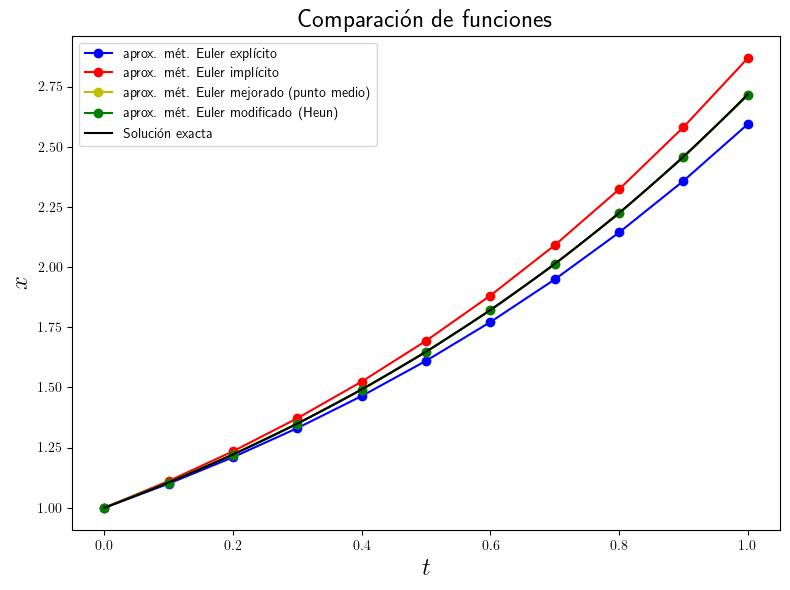

In [ ]:
# Probamos las funciones recién desarrolladas
a,b = 0,1   # Extermos inferior y superior del intervalo
mu = 1      # Consición inicial del PVI
N = 10

num_puntos = 100 # Puntos para graficar la solución exacta

# Definimos la función f
t, x0, x = sp.symbols('t, x_0, x')
def f(t,x):
    return x

# Calculo la solución exacta (como se hace en los apuntes)
x = sp.Function('x')
edo = x(t).diff(t)-f(t,x(t))
edo_sol = sp.dsolve(edo)
ics = {x(0): x0}
CI_eq = sp.Eq(edo_sol.lhs.subs({t: 0}).subs(ics), edo_sol.rhs.subs({t: 0}))
CI_sol = sp.solve(CI_eq)[0]
edo_sol_part = edo_sol.subs(CI_sol)
sol_exacta = edo_sol_part.rhs.subs({x0:mu})
sol_exacta_np = sp.lambdify(t, sol_exacta, 'numpy')
t_values_exac = np.linspace(a, b, num_puntos) # así obtendríamos el array de abcisas
x_values_exac = sol_exacta_np(t_values_exac) # y el de ordenadas


# Calculo las aproximaciones
t_values_Eulerexpl, x_values_Eulerexpl = euler_explicito(f,a,b,mu,N)
t_values_Eulerimpl, x_values_Eulerimpl = euler_implicito(f,a,b,mu,N)
t_values_Eulermej, x_values_Eulermej = euler_mejorado(f,a,b,mu,N)
t_values_Eulermod, x_values_Eulermod = euler_modificado(f,a,b,mu,N)

print(Title(f"Prueba de las funciones de Euler: "))

print(f"\nMétodo de Euler explícito: ")
print(f"{x_values_Eulerexpl}\n")

print(f"\nMétodo de Euler implícito: ")
print(f"{x_values_Eulerimpl}\n")

print(f"\nMétodo de Euler mejorado: ")
print(f"{x_values_Eulermej}\n")

print(f"\nMétodo de Euler modificado: ")
print(f"{x_values_Eulermod}\n")

print(f"\nSolución exacta: ")
# La muestro solo en los mismos puntos que las otras (para comparar)
print(f"{sol_exacta_np(t_values_Eulerexpl)}\n") 

# Grafico los resultados
euler_expl = {"x_values" : t_values_Eulerexpl,
             "y_values" : x_values_Eulerexpl,
             "label" : "aprox. mét. Euler explícito",
             "style": 'bo-'}

euler_impl = {"x_values" : t_values_Eulerimpl,
             "y_values" : x_values_Eulerimpl,
             "label" : "aprox. mét. Euler implícito",
             "style": 'ro-'}

euler_mej = {"x_values" : t_values_Eulermej,
             "y_values" : x_values_Eulermej,
             "label" : "aprox. mét. Euler mejorado (punto medio)",
             "style": 'yo-'}

euler_mod = {"x_values" : t_values_Eulermod,
             "y_values" : x_values_Eulermod,
             "label" : "aprox. mét. Euler modificado (Heun)",
             "style": 'go-'}

exacta = {"x_values" : t_values_exac,
             "y_values" : x_values_exac,
             "label" : "Solución exacta",
             "style": 'k'}

grafica_comparativa([euler_expl, euler_impl, euler_mej, euler_mod, exacta], 8, 6)

Se puede observar que los 2 últimos métodos están mucho más cerca de la solución exacta

### Ejercicio 4

Programe el método de Runge-Kutta de 4 evaluaciones y grafique la sucesión de aproximaciones y calcule el error cuadrático medio y el máximo error absoluto con respecto a la solución exacta.

### Ejercicio 5

Se pretende aproximar la solución del PVI:
$$
\left\{\begin{array}{rcl}
x'(t) &=& \dfrac{t-x(t)} 2 \\
x(0) &=& 1
\end{array}\right..
$$
en $[0,3]$
1. Usa el método de Runge-Kutta de 2 evaluaciones con $\alpha= 3/4$ y $\beta=2/3$ para $h = 1$, $h = 1/2$, $h = 1/4$ y $h = 1/8$ y compara los resultados obtenidos.
2. Repite el apartado anterior usando Runge-Kutta clásico.

Nota: La solución exacta es $x(t) = 3 e^{-t/2} + t -2$.

### Ejercicio 7

Implemente un método MML Predictor-Corrector combinando un predictor AB de 5 pasos con un corrector AM de 4, y aplicando una sólo corrección en cada iteración:
$$
P: \qquad x_{n+5}^{(0)} = x_{n+4} + \frac{h}{720} (1901 f_{n+4} -2774 f_{n+3} +2616 f_{n+2} - 1274 f_{n+1} + 251 f_n)
$$
$$
C^1: \qquad  x_{n+5} = x_{n+4} + \frac{h}{720} (251 f(t_{n+5},x_{n+5}^{(0)}) + 646 f_{n+4} -264 f_{n+3} +106 f_{n+2} - 19 f_{n+1} )
$$

### Ejercicio 9

ado el siguiente PVI definido para $t\in[0,1]$:
$$\left\{\begin{array}{rcl}
x'(t) &=& \cos(x(t)) + t^2 \\
x(0) &=& 1
\end{array}\right.
$$
- Intente encontrar la solución exacta del PVI.
- Aproxime numéricamente el PVI utilizando los métodos que considere y represente gráficamente las diferentes aproximaciones en el intervalo $[0,1]$.
- Para el método que observe que devuelve mejores resultados, estudie su sensibilidad a distintos valores de $N$ (por tanto de $h$).

#### Apartado 1

#### Apartado 2

#### Apartado 3